In [2]:
require(ISLR2)


Loading required package: ISLR2



In [3]:
attach(Wage)


In [4]:
fit <- lm(wage ~ poly(age, 4), data = Wage)


In [5]:
summary(fit)



Call:
lm(formula = wage ~ poly(age, 4), data = Wage)

Residuals:
    Min      1Q  Median      3Q     Max 
-98.707 -24.626  -4.993  15.217 203.693 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    111.7036     0.7287 153.283  < 2e-16 ***
poly(age, 4)1  447.0679    39.9148  11.201  < 2e-16 ***
poly(age, 4)2 -478.3158    39.9148 -11.983  < 2e-16 ***
poly(age, 4)3  125.5217    39.9148   3.145  0.00168 ** 
poly(age, 4)4  -77.9112    39.9148  -1.952  0.05104 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 39.91 on 2995 degrees of freedom
Multiple R-squared:  0.08626,	Adjusted R-squared:  0.08504 
F-statistic: 70.69 on 4 and 2995 DF,  p-value: < 2.2e-16


In [6]:
agelims <- range(age)


In [7]:
age_grid <- seq(from = agelims[1], to = agelims[2])


In [8]:
age_grid


[1] 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42
[26] 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67
[51] 68 69 70 71 72 73 74 75 76 77 78 79 80

In [9]:
preds <- predict(fit, newdata = list(age = age_grid), se = TRUE)


In [10]:
se_bands <- cbind(preds$fit + 2 * preds$se, preds$fit - 2 * preds$se)


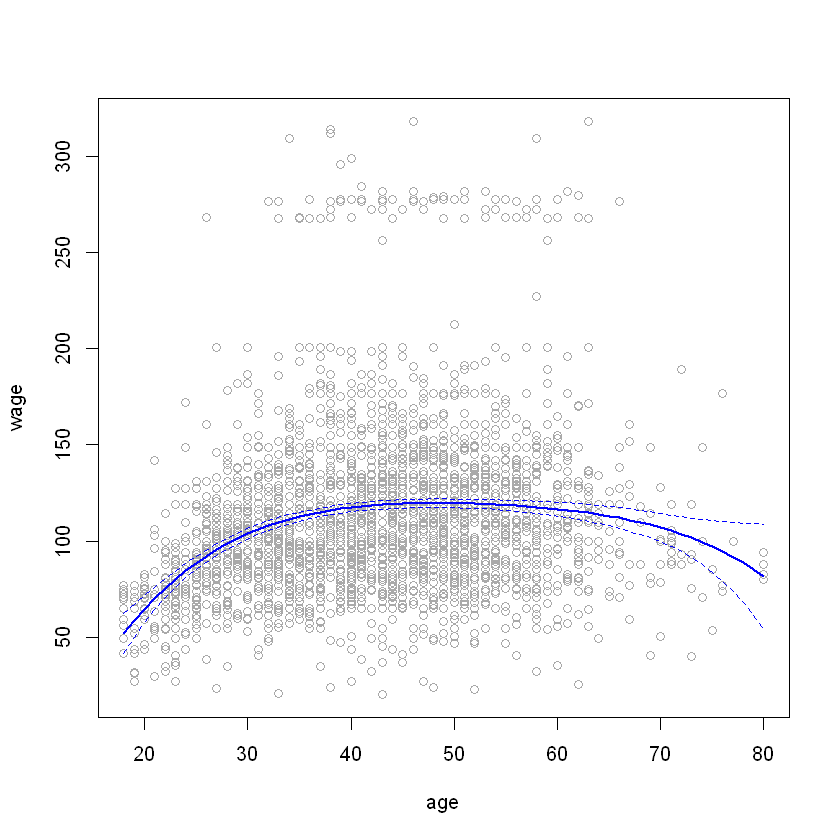

In [11]:
plot(age, wage, col = "darkgrey")
lines(age_grid, preds$fit, lwd = 2, col = "blue")
matlines(age_grid, se_bands, col = "blue", lty = 2)


In [12]:
fit_a <- lm(wage ~ age + I(age^2) + I(age^3) + I(age^4), data = Wage)


In [13]:
summary(fit_a)



Call:
lm(formula = wage ~ age + I(age^2) + I(age^3) + I(age^4), data = Wage)

Residuals:
    Min      1Q  Median      3Q     Max 
-98.707 -24.626  -4.993  15.217 203.693 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.842e+02  6.004e+01  -3.067 0.002180 ** 
age          2.125e+01  5.887e+00   3.609 0.000312 ***
I(age^2)    -5.639e-01  2.061e-01  -2.736 0.006261 ** 
I(age^3)     6.811e-03  3.066e-03   2.221 0.026398 *  
I(age^4)    -3.204e-05  1.641e-05  -1.952 0.051039 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 39.91 on 2995 degrees of freedom
Multiple R-squared:  0.08626,	Adjusted R-squared:  0.08504 
F-statistic: 70.69 on 4 and 2995 DF,  p-value: < 2.2e-16


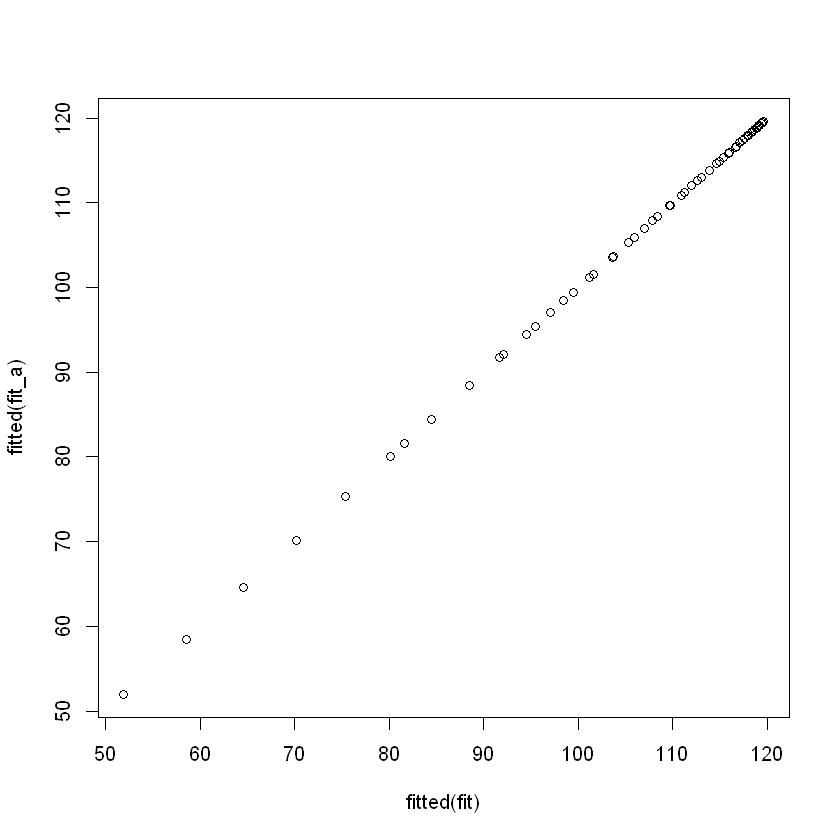

In [14]:
plot(fitted(fit), fitted(fit_a))


In [15]:
summary(fit)



Call:
lm(formula = wage ~ poly(age, 4), data = Wage)

Residuals:
    Min      1Q  Median      3Q     Max 
-98.707 -24.626  -4.993  15.217 203.693 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    111.7036     0.7287 153.283  < 2e-16 ***
poly(age, 4)1  447.0679    39.9148  11.201  < 2e-16 ***
poly(age, 4)2 -478.3158    39.9148 -11.983  < 2e-16 ***
poly(age, 4)3  125.5217    39.9148   3.145  0.00168 ** 
poly(age, 4)4  -77.9112    39.9148  -1.952  0.05104 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 39.91 on 2995 degrees of freedom
Multiple R-squared:  0.08626,	Adjusted R-squared:  0.08504 
F-statistic: 70.69 on 4 and 2995 DF,  p-value: < 2.2e-16


In [16]:
fit_b <- lm(wage ~ education, data = Wage)
fit_c <- lm(wage ~ education + age, data = Wage)
fit_d <- lm(wage ~ education + poly(age, 2), data = Wage)
fit_e <- lm(wage ~ education + poly(age, 3), data = Wage)
anova(fit_b, fit_c, fit_d, fit_e)


,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2995,3995721,NA,NA,NA,NA
2,2994,3867992,1,127728.88,102.737760,9.215004e-24
3,2993,3725395,1,142597.10,114.696898,2.728971e-26
4,2992,3719809,1,5586.66,4.493588,3.410431e-02


In [17]:
fit_binomial = glm(I(wage > 250) ~ poly(age, 3), data = Wage, family = binomial)

In [18]:
pred_bi = predict(fit_binomial, list(age = age_grid), se = TRUE)

In [19]:
bi_se_bands <- pred_bi$fit + cbind(fit_binomial = 0, lower = - 2 * pred_bi$se, upper = 2 * pred_bi$se)

In [20]:
bi_se_bands

,fit_binomial,lower,upper
1,-7.664756,-10.759826,-4.569686
2,-7.324776,-10.106699,-4.542852
3,-7.001732,-9.492821,-4.510643
4,-6.695229,-8.917158,-4.473300
5,-6.404868,-8.378691,-4.431045
6,-6.130251,-7.876426,-4.384076
7,-5.870980,-7.409397,-4.332563
8,-5.626658,-6.976672,-4.276644
9,-5.396887,-6.577351,-4.216423
10,-5.181269,-6.210574,-4.151964


In [21]:
prob_bands = exp(bi_se_bands) / (1 + exp(bi_se_bands))

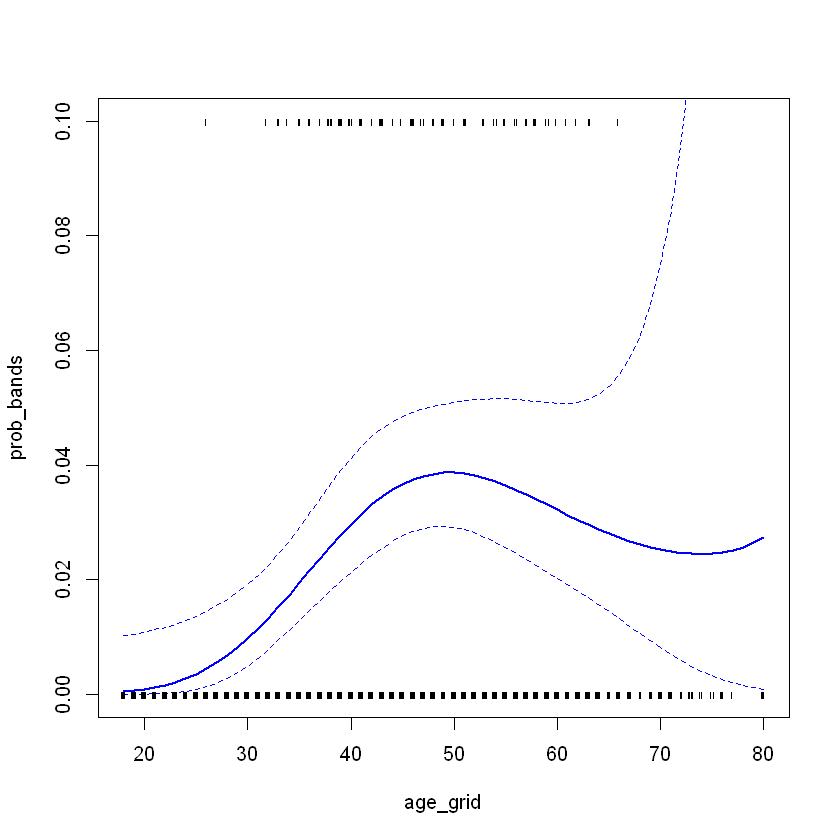

In [22]:
matplot(age_grid, prob_bands,
    col = "blue",
    lwd = c(2, 1, 1),
    lty = c(1, 2, 2),
    type = "l",
    ylim = c(0, 0.1)
)
points(
    jitter(age), I(wage > 250) / 10,
    pch = "I",
    cex = 0.5
)


In [23]:
require(splines)

Loading required package: splines



In [24]:
fit_cubic <- lm(wage ~ bs(age, knots = c(25, 40, 60)), data = Wage)

In [32]:
pred_cubic = predict(fit_cubic, list(age = age_grid), se = TRUE)

In [33]:
pred_cubic

$fit
        1         2         3         4         5         6         7         8 
 60.49371  62.71254  65.81602  69.59243  73.83004  78.31713  82.84196  87.19283 
        9        10        11        12        13        14        15        16 
 91.19650  94.83381  98.12409 101.08668 103.74092 106.10614 108.20167 110.04685 
       17        18        19        20        21        22        23        24 
111.66102 113.06351 114.27367 115.31081 116.19429 116.94344 117.57759 118.11364 
       25        26        27        28        29        30        31        32 
118.55875 118.91764 119.19504 119.39567 119.52425 119.58550 119.58415 119.52492 
       33        34        35        36        37        38        39        40 
119.41254 119.25171 119.04718 118.80365 118.52586 118.21852 117.88636 117.53410 
       41        42        43        44        45        46        47        48 
117.16646 116.78817 116.40394 116.01381 115.59895 115.13585 114.60101 113.97091 
       49        50        51        52        53        54        55        56 
113.22204 112.33089 111.27394 110.02768 108.56860 106.87318 104.91792 102.67930 
       57        58        59        60        61        62        63 
100.13381  97.25793  94.02816  90.42098  86.41288  81.98034  77.09986 

$se.fit
        1         2         3         4         5         6         7         8 
 9.460394  5.625190  3.775855  3.334695  3.220376  2.921233  2.451880  2.011729 
        9        10        11        12        13        14        15        16 
 1.760783  1.670072  1.659764  1.666456  1.655472  1.614184  1.543491  1.452433 
       17        18        19        20        21        22        23        24 
 1.355140  1.268376  1.207967  1.183454  1.193311  1.224855  1.259107  1.278499 
       25        26        27        28        29        30        31        32 
 1.277280  1.257132  1.223447  1.184020  1.148032  1.124745  1.121673  1.142627 
       33        34        35        36        37        38        39        40 
 1.186676  1.248748  1.321421  1.396837  1.468136  1.530431  1.581680  1.623756 
       41        42        43        44        45        46        47        48 
 1.663904  1.716369  1.803249  1.951510  2.176881  2.472962  2.818414  3.186974 
       49        50        51        52        53        54        55        56 
 3.553705  3.897939  4.205057  4.468583  4.693403  4.900458  5.132349  5.457048 
       57        58        59        60        61        62        63 
 5.964058  6.748679  7.890625  9.442197 11.432081 13.876266 16.786914 

$df
[1] 2993

$residual.scale
[1] 39.92466

In [25]:
summary(fit_cubic)


Call:
lm(formula = wage ~ bs(age, knots = c(25, 40, 60)), data = Wage)

Residuals:
    Min      1Q  Median      3Q     Max 
-98.832 -24.537  -5.049  15.209 203.207 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                       60.494      9.460   6.394 1.86e-10 ***
bs(age, knots = c(25, 40, 60))1    3.980     12.538   0.317 0.750899    
bs(age, knots = c(25, 40, 60))2   44.631      9.626   4.636 3.70e-06 ***
bs(age, knots = c(25, 40, 60))3   62.839     10.755   5.843 5.69e-09 ***
bs(age, knots = c(25, 40, 60))4   55.991     10.706   5.230 1.81e-07 ***
bs(age, knots = c(25, 40, 60))5   50.688     14.402   3.520 0.000439 ***
bs(age, knots = c(25, 40, 60))6   16.606     19.126   0.868 0.385338    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 39.92 on 2993 degrees of freedom
Multiple R-squared:  0.08642,	Adjusted R-squared:  0.08459 
F-statistic: 47.19 on 6 and 2993 DF,  p-value: < 

In [38]:
cubic_se_bands <- pred_cubic$fit + cbind(fit_cubic = 0, lower = - 2 * pred_cubic$se, upper = 2 * pred_cubic$se)

In [39]:
cubic_se_bands

,fit_cubic,lower,upper
1,60.49371,41.57293,79.41450
2,62.71254,51.46216,73.96292
3,65.81602,58.26431,73.36773
4,69.59243,62.92304,76.26182
5,73.83004,67.38929,80.27079
6,78.31713,72.47466,84.15959
7,82.84196,77.93820,87.74572
8,87.19283,83.16937,91.21628
9,91.19650,87.67493,94.71807
10,94.83381,91.49367,98.17395


In [52]:
library(repr)

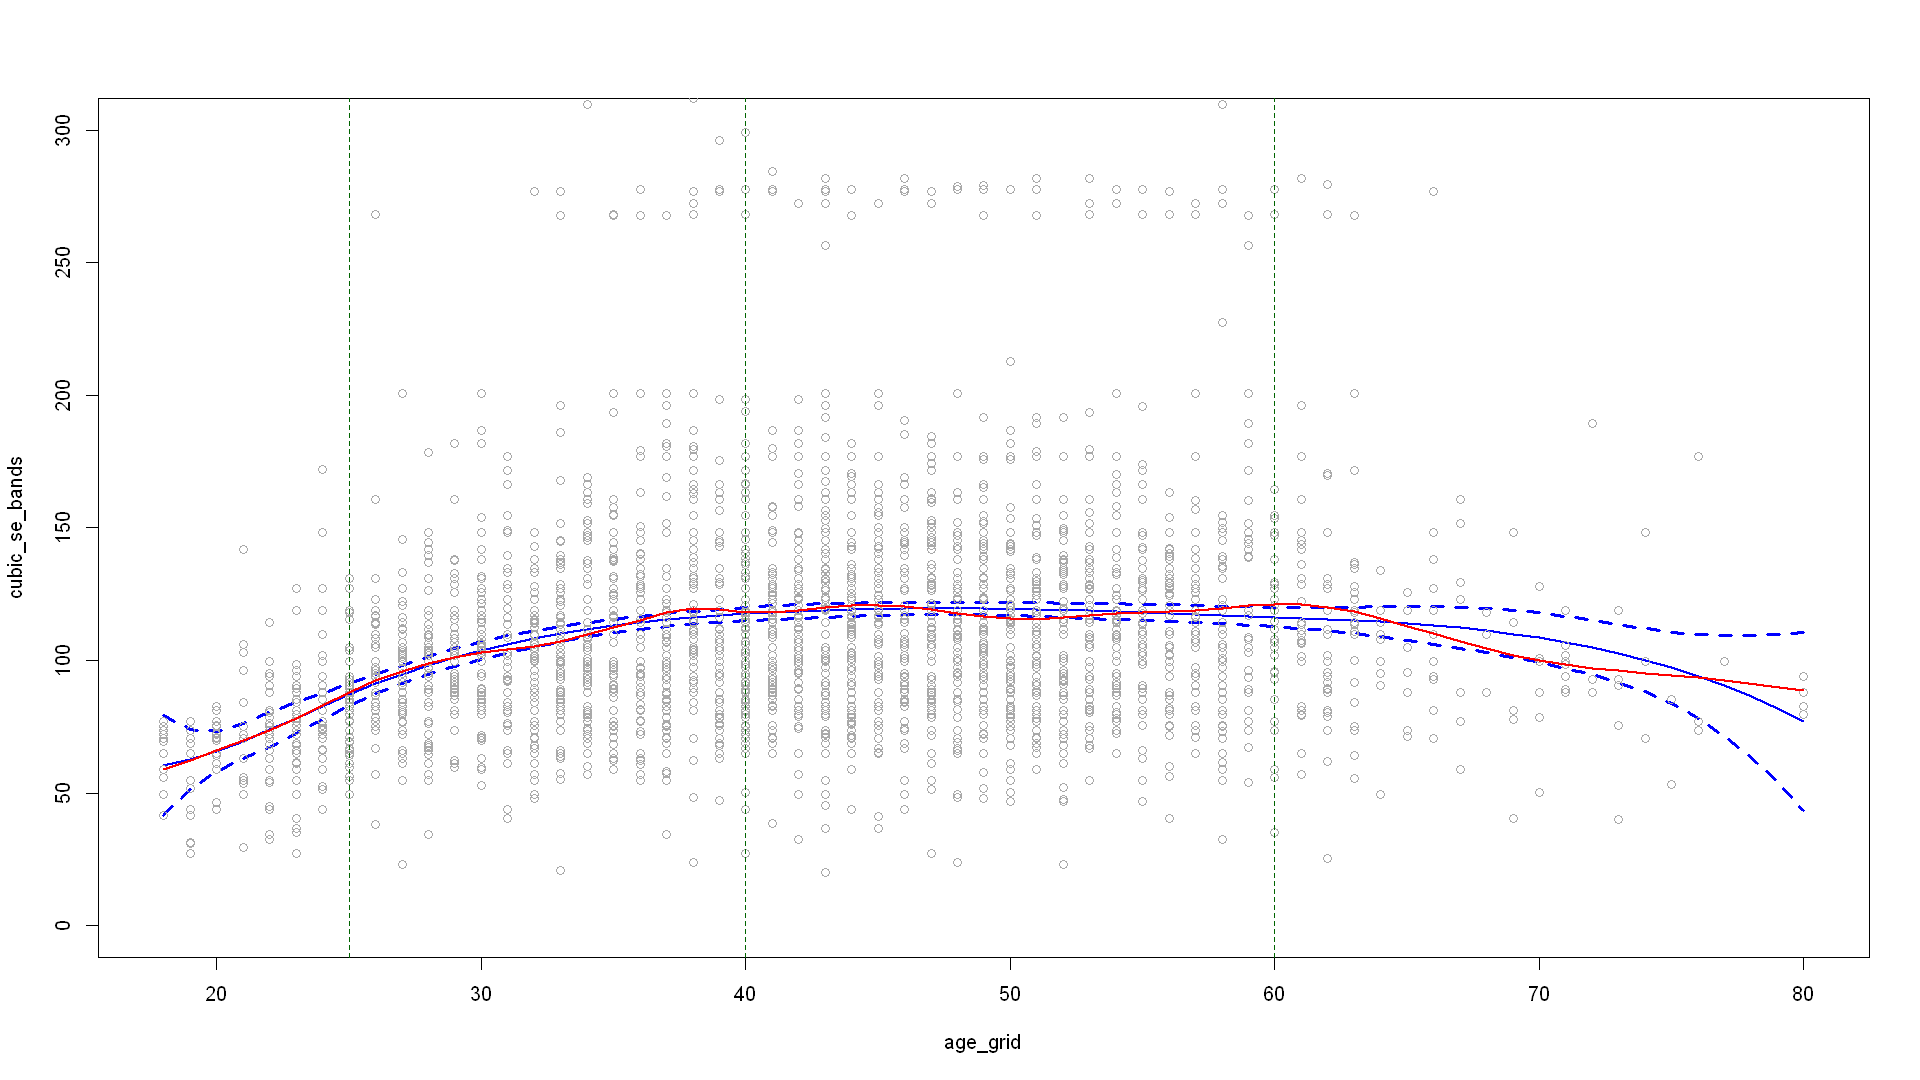

In [80]:

# Set the plot width and height
options(repr.plot.width = 16, repr.plot.height = 9)
matplot(age_grid, cubic_se_bands,
    col = "blue",
    lwd = c(2, 3, 3),
    lty = c(1, 2, 2),
    type = "l",
    ylim = c(0, 300)
)
points(age, wage, col = "darkgrey" )
abline(v = c(25, 40, 60), lty =2, col = "darkgreen")
fit_poly_16 = smooth.spline(age, wage,df = 16)
lines(fit_poly_16, col = "red", lwd = 2)

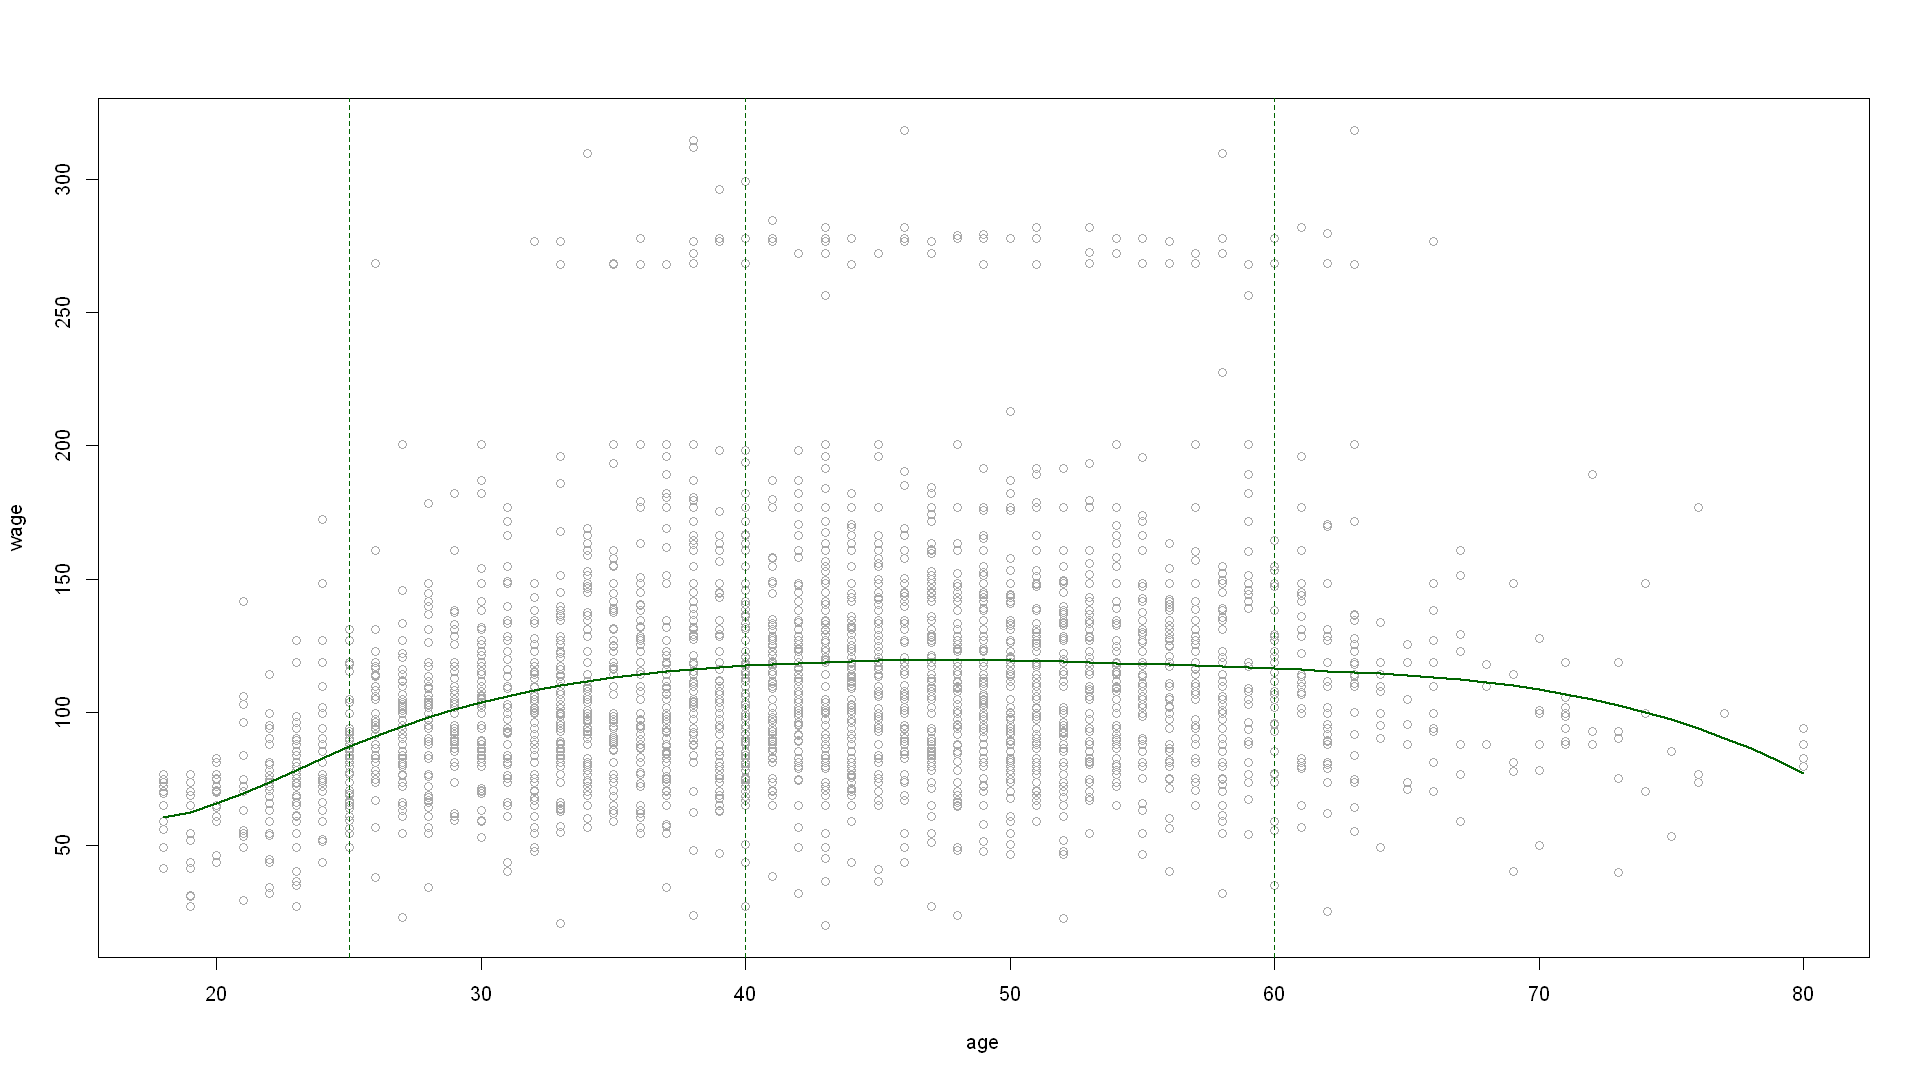

In [55]:
plot(age, wage, col = "darkgrey")
lines(age_grid, predict(fit_cubic, list(age = age_grid)), col = "darkgreen", lwd = 2)
abline(v = c(25, 40, 60), lty =2, col = "darkgreen")

In [56]:
fit_poly_CV = smooth.spline(age, wage, cv = TRUE)

Warning message in smooth.spline(age, wage, cv = TRUE):
"cross-validation with non-unique 'x' values seems doubtful"


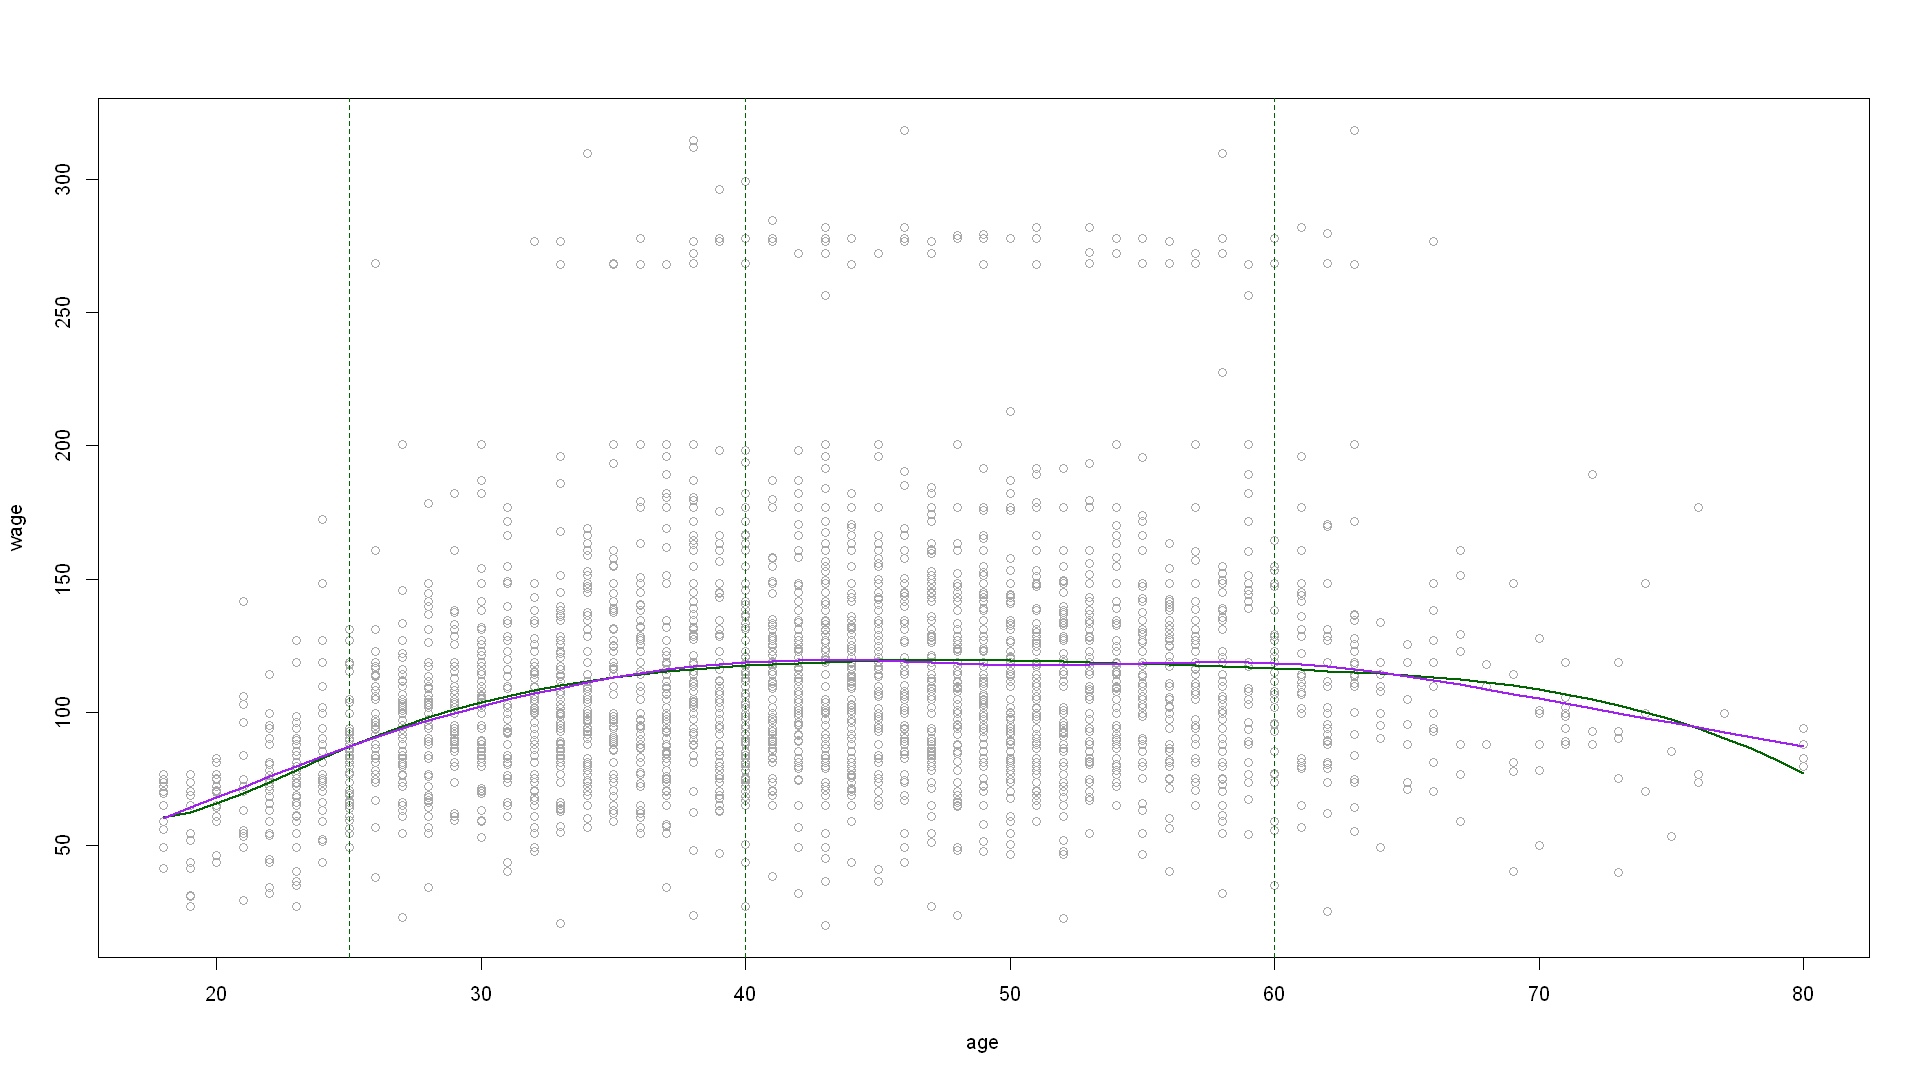

In [61]:
plot(age, wage, col = "darkgrey")
lines(age_grid, predict(fit_cubic, list(age = age_grid)), col = "darkgreen", lwd = 2)
abline(v = c(25, 40, 60), lty =2, col = "darkgreen")
lines(fit_poly_CV, col = "purple", lwd = 2)

In [63]:
fit_poly_CV

Call:
smooth.spline(x = age, y = wage, cv = TRUE)

Smoothing Parameter  spar= 0.6988943  lambda= 0.02792303 (12 iterations)
Equivalent Degrees of Freedom (Df): 6.794596
Penalized Criterion (RSS): 75215.9
PRESS(l.o.o. CV): 1593.383

In [67]:
require(gam)

Loading required package: gam

Loading required package: foreach

Loaded gam 1.22-3




In [68]:
gam_1 <- gam(wage ~ s(age, df = 4) + s(year, df = 4) + education, data = Wage)

In [69]:
par(mfrow = c(1,3))

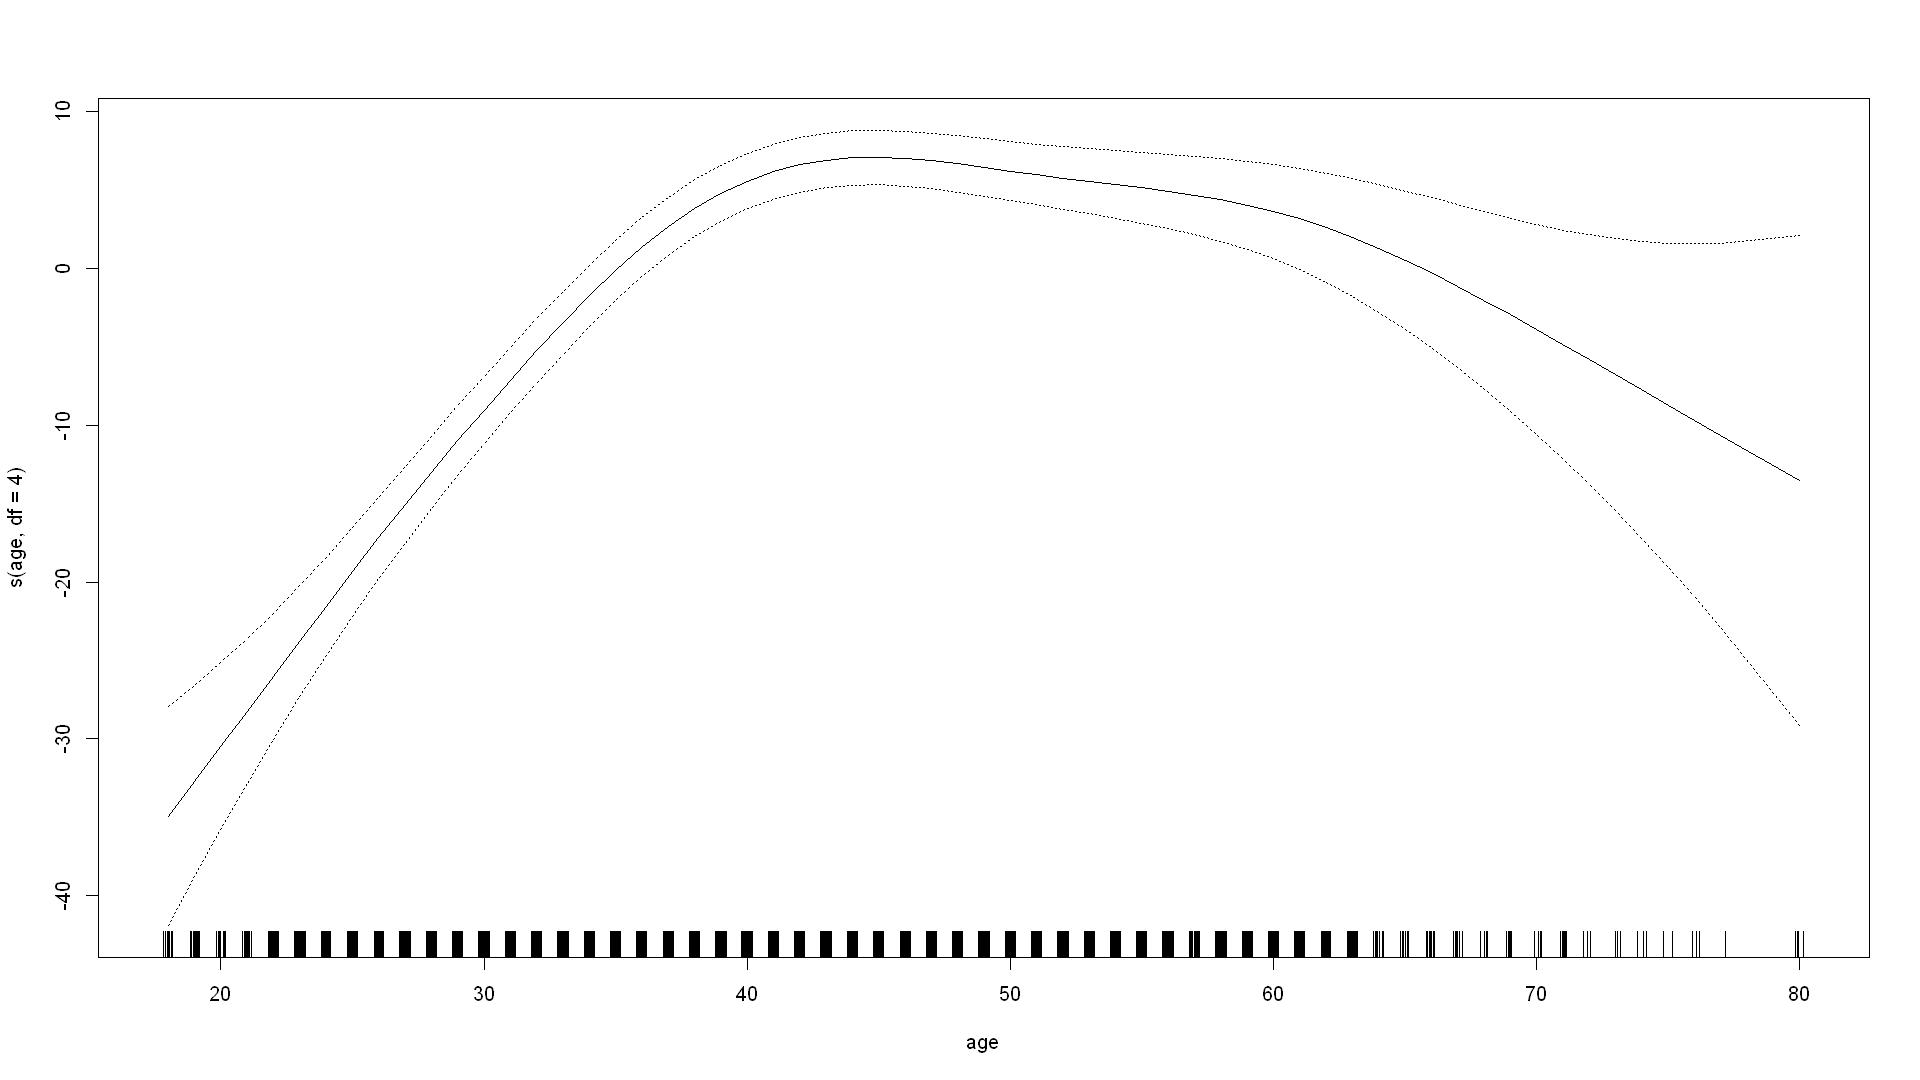

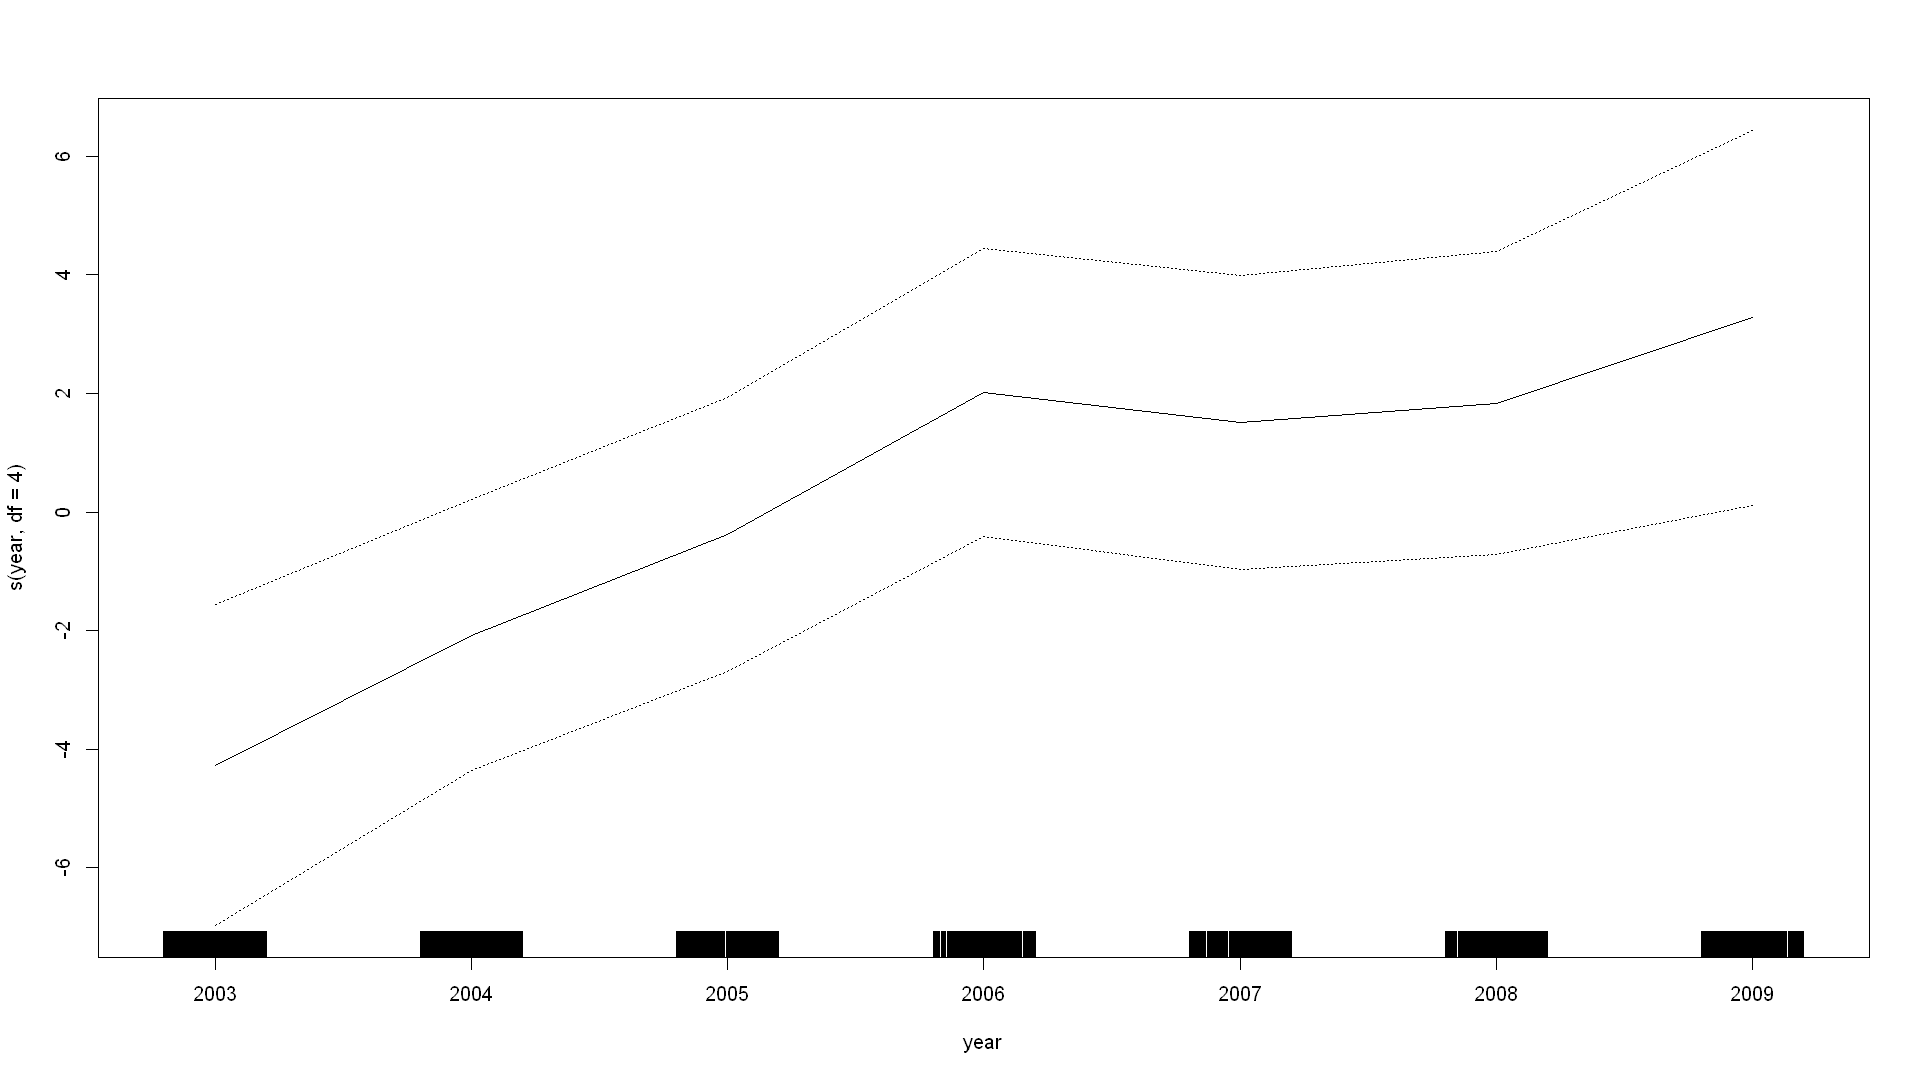

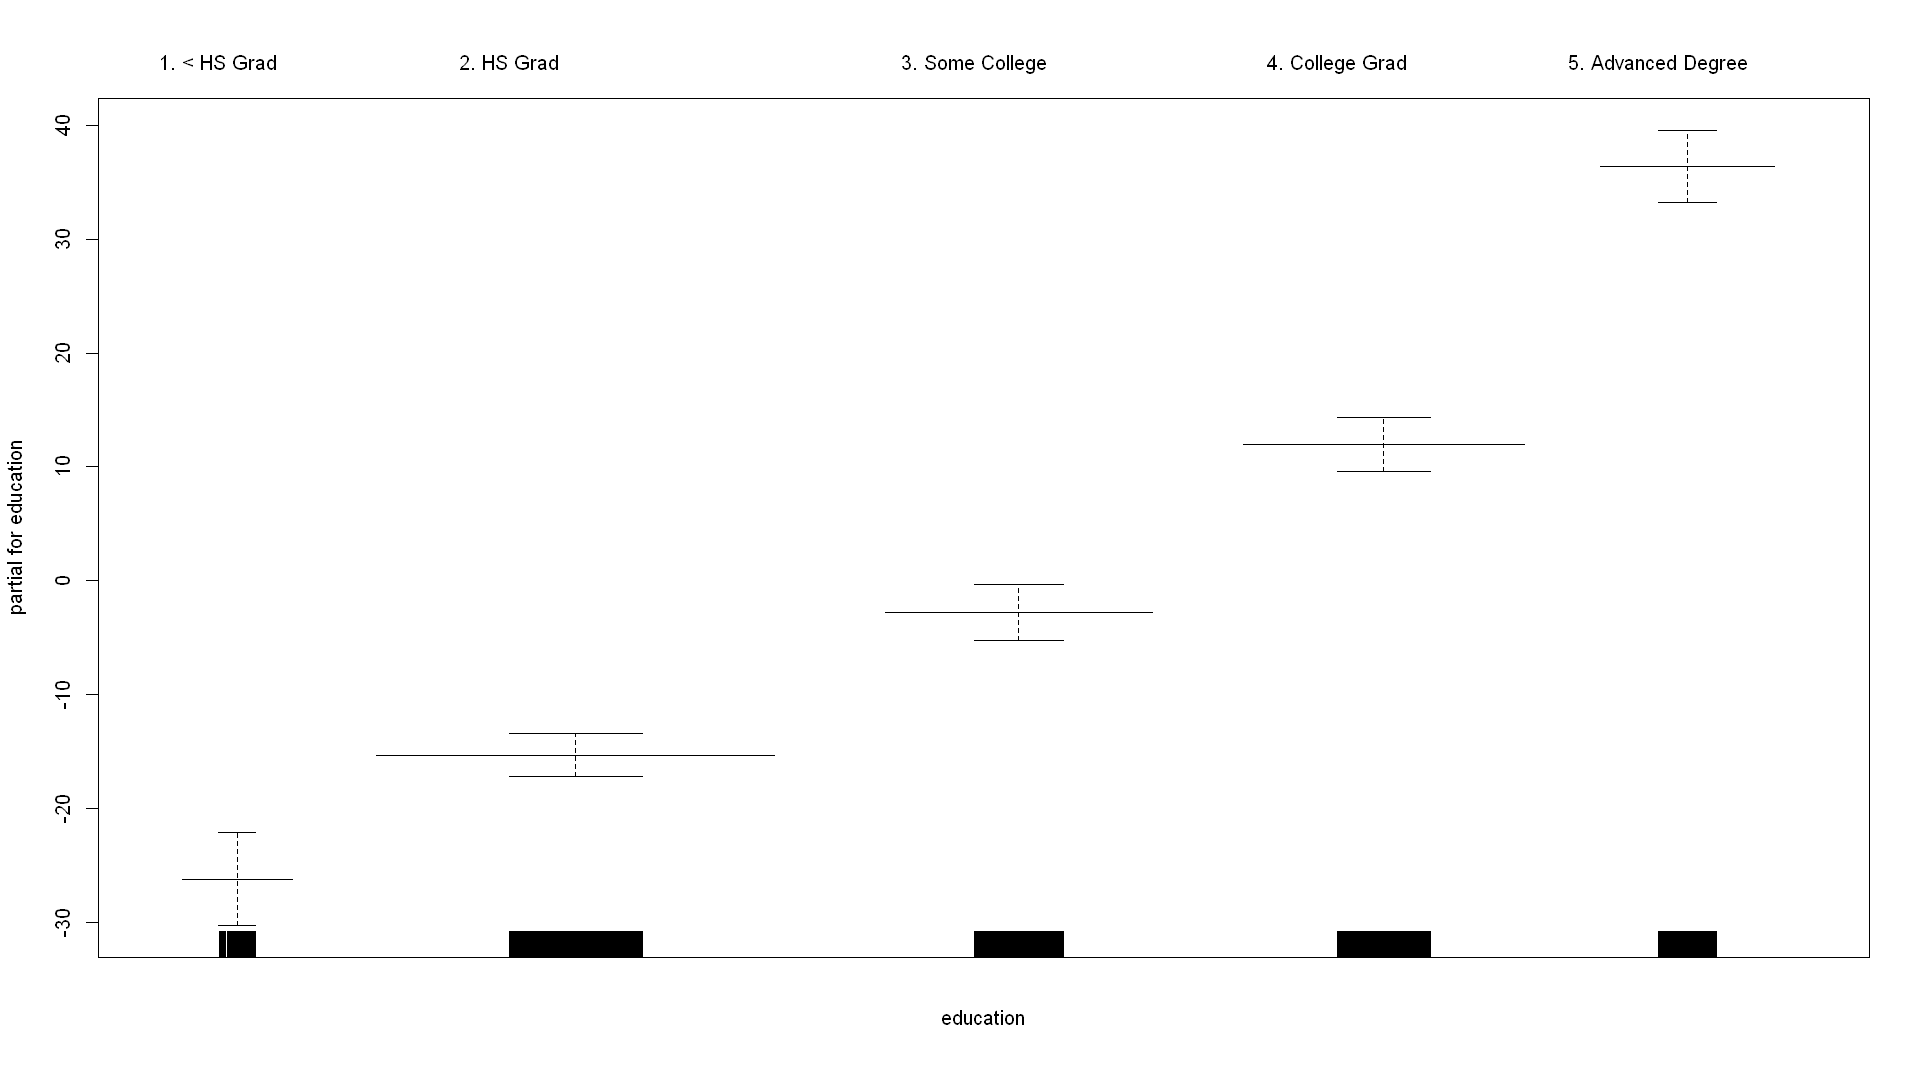

In [70]:
plot(gam_1, se = TRUE)

In [74]:
gam_2 <- gam(I(wage > 250) ~ s(age, df = 4) + s(year, df = 4) + education, data = Wage, family = binomial)


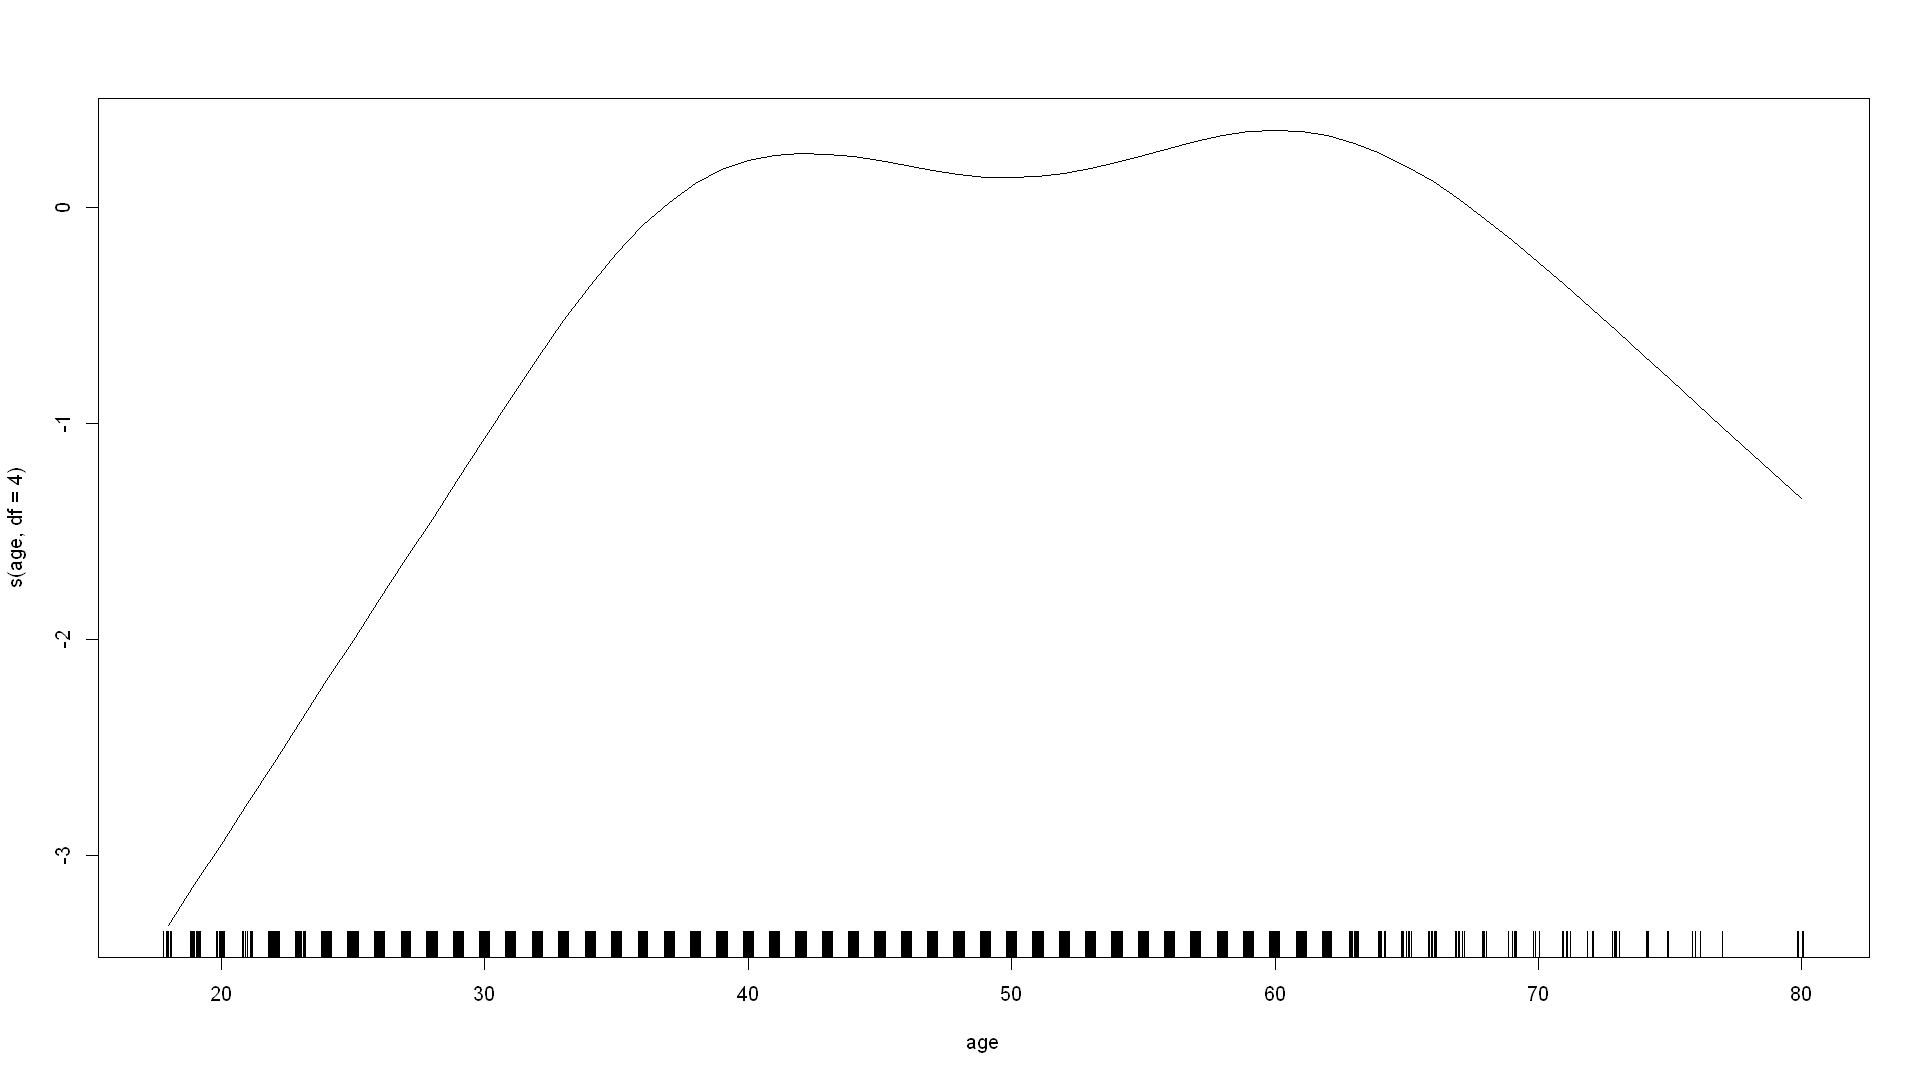

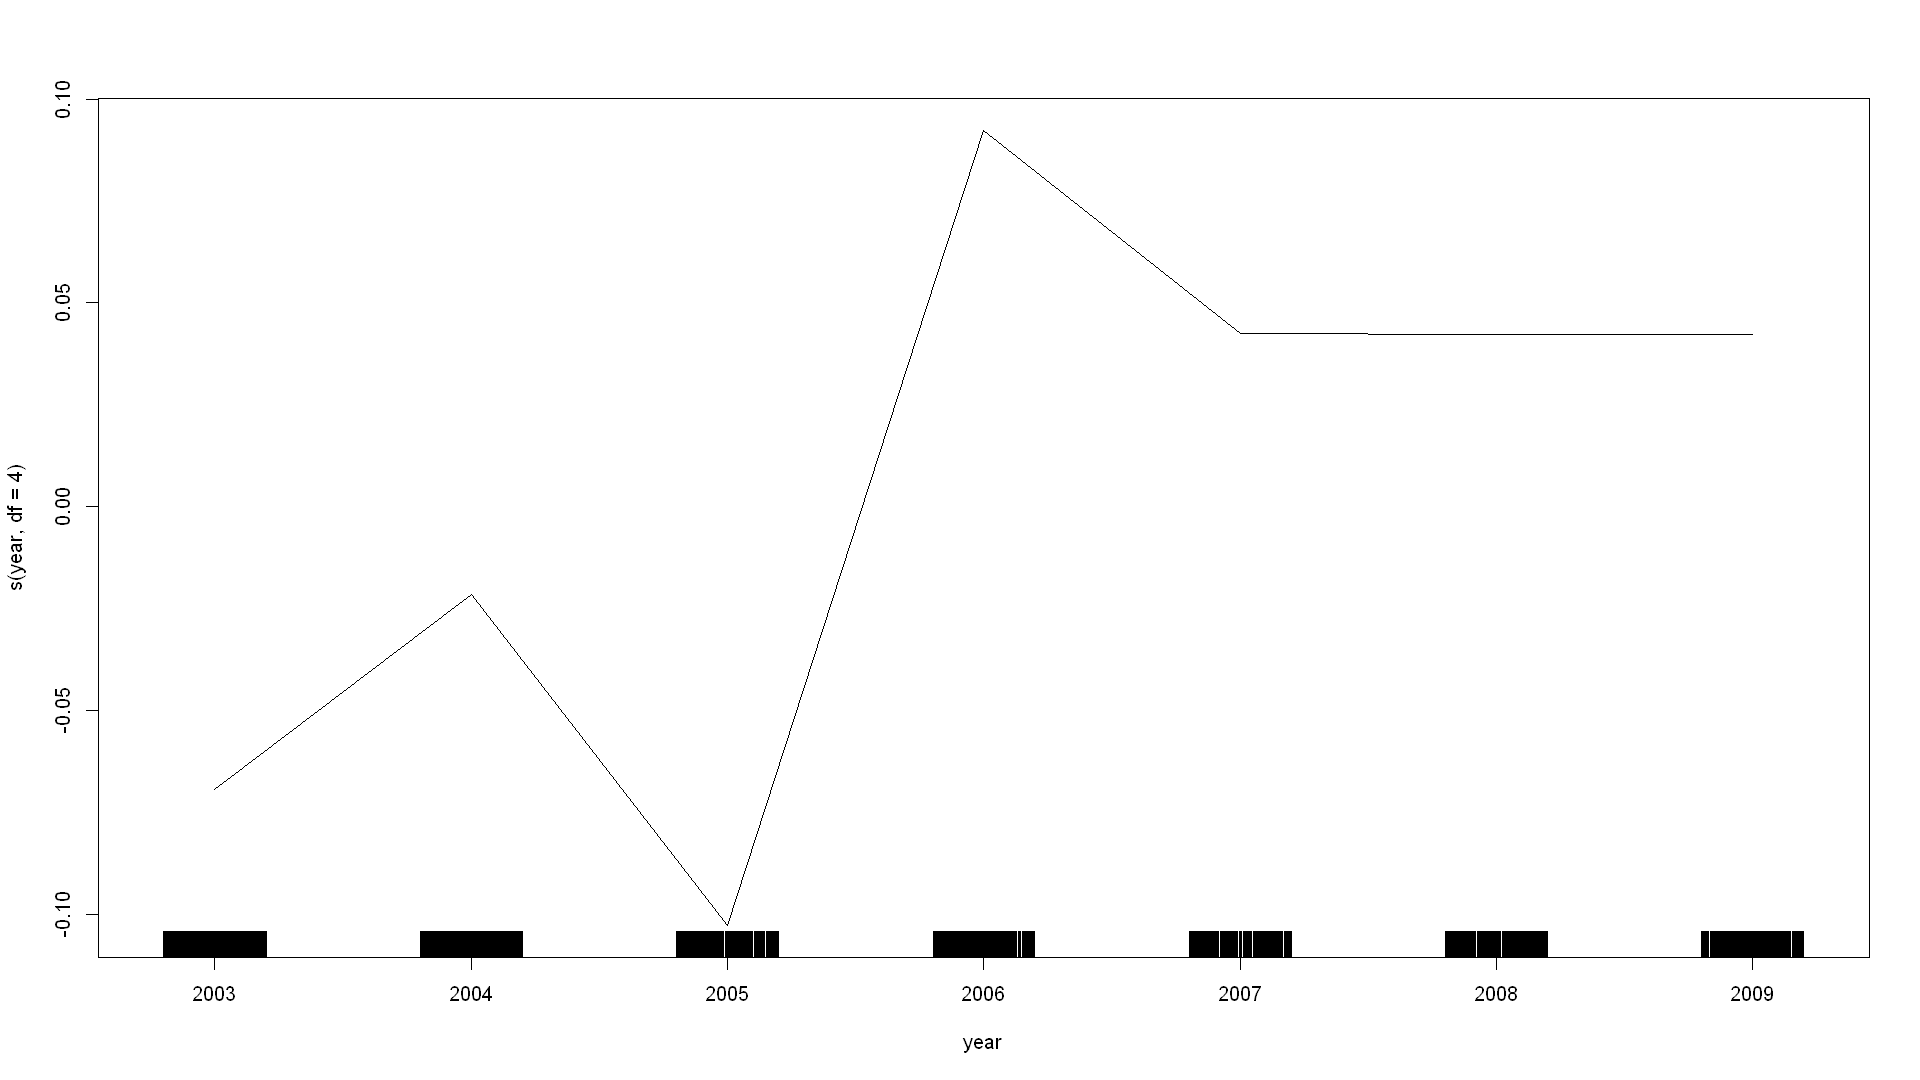

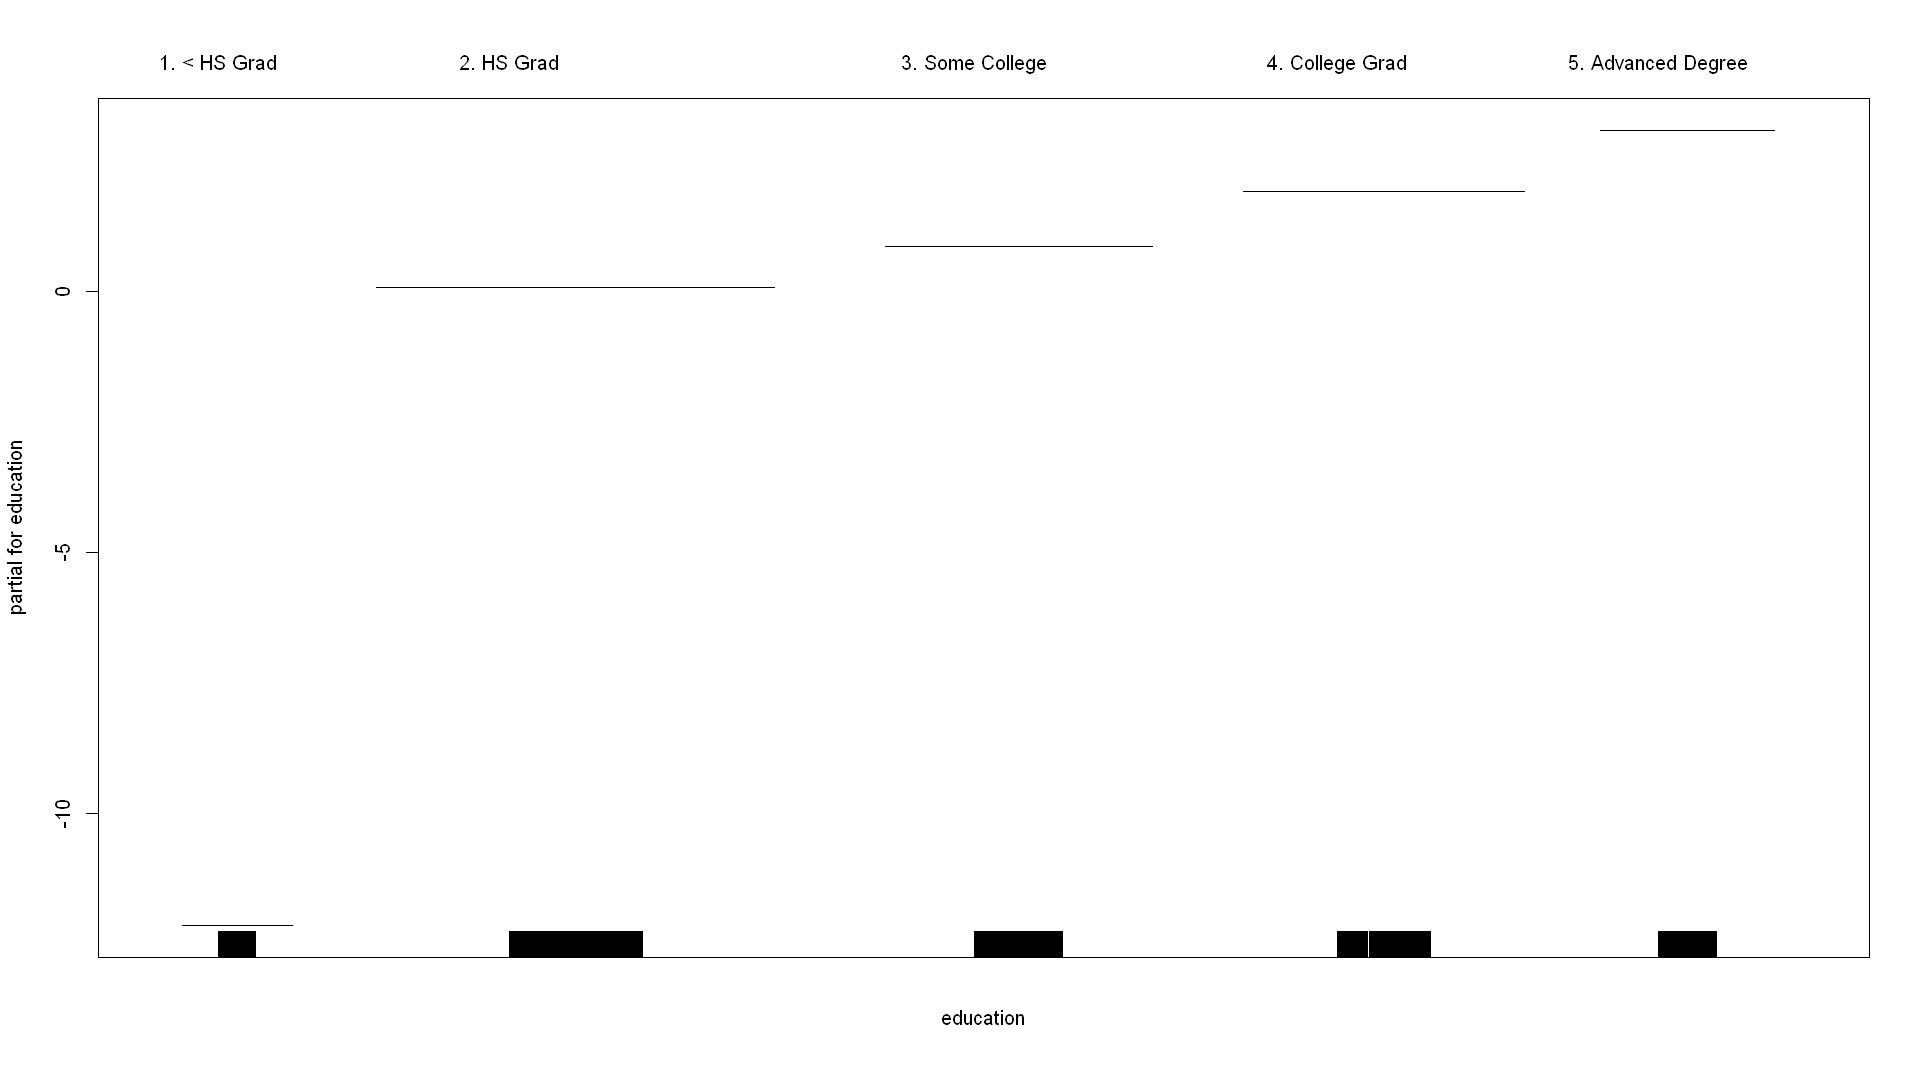

In [75]:
plot(gam_2)

In [76]:
gam_2a <- gam(I(wage > 250) ~ s(age, df = 4) + year + education, data = Wage, family = binomial)


In [78]:
anova(gam_2a, gam_2, test = "Chisq")

,Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2990,603.7774,NA,NA,NA
2,2987,602.8725,2.999983,0.9049826,0.8242229
